In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def Process(mu,sigma_x,sigma_y,H,y):
    b=sigma_y+H@sigma_x@H.transpose()
    k=np.matmul(sigma_x,H.transpose())@np.linalg.inv(b)
    mu_post=mu+k@(y-H@mu)
    sigma_post=(np.eye(2)-k@H)@sigma_x
    return sigma_post,mu_post

In [28]:
sigma_y=np.matrix([[0.25,0],[0,0.25]])
sigma_x=np.matrix([[0.1,0.01],[0.01,0.1]])
y=np.matrix([[90],[91]])
mu=np.matrix([[76.9],[91]])
H=np.eye(2)
sigma_post,mu_post=Process(mu,sigma_x,sigma_y,H,y)

In [29]:
sigma_post

matrix([[0.07128268, 0.00510621],
        [0.00510621, 0.07128268]])

In [30]:
mu_post

matrix([[80.63521242],
        [91.26756536]])

In [34]:
sigma_y

matrix([[0.25, 0.  ],
        [0.  , 0.25]])

In [33]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

# a

In [21]:
def Ext(mean, sigma_x,sigma_y,H,y,p):
    b=np.linalg.inv(sigma_y +H@sigma_x@H.transpose())
    k=sigma_x@H.transpose()@b
    mean_post=mean+k@(y-H@mean)
    sigma_post=(np.identity(p)-k@H)@sigma_x
    return mean_post,sigma_post

In [22]:
sigma_x=0.1*np.identity(12)
sigma_y=0.25*np.identity(12)

In [23]:
mean=np.matrix([[76.9],[91],[114.2],[154.2],[88.1],[18.6],[11.4],[31.1],[69.6],[105.7],[112.7],[77.4]])

In [24]:
y=np.matrix([[80],[90],[110],[160],[80],[20],[10],[40],[70],[100],[110],[80]])

In [25]:
H=np.identity(12)

In [26]:
p=12

In [27]:
mean_post,sigma_post=Ext(mean, sigma_x,sigma_y,H,y,p)

In [28]:
mean_post

matrix([[ 77.78571429],
        [ 90.71428571],
        [113.        ],
        [155.85714286],
        [ 85.78571429],
        [ 19.        ],
        [ 11.        ],
        [ 33.64285714],
        [ 69.71428571],
        [104.07142857],
        [111.92857143],
        [ 78.14285714]])

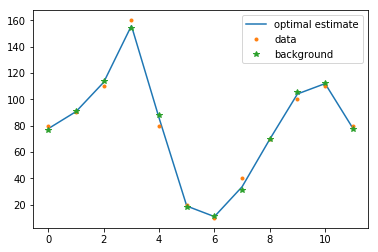

In [58]:
plt.plot(mean_post)
plt.plot(y,".")
plt.plot(mean,"*")
plt.legend(["optimal estimate","data","background"])

# b

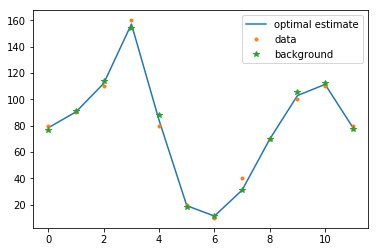

In [57]:
sigma_x=0.25*np.identity(12)
sigma_y=0.25*np.identity(12)
mean_post1,sigma_post=Ext(mean, sigma_x,sigma_y,H,y,p)

plt.plot(mean_post1)
plt.plot(y,".")
plt.plot(mean,"*")
plt.legend(["optimal estimate","data","background"])

In [31]:
mean_post1

matrix([[ 78.45],
        [ 90.5 ],
        [112.1 ],
        [157.1 ],
        [ 84.05],
        [ 19.3 ],
        [ 10.7 ],
        [ 35.55],
        [ 69.8 ],
        [102.85],
        [111.35],
        [ 78.7 ]])

# c

In [82]:
H=np.zeros((12,12))
H[0,0]=H[1,1]=H[2,2]=H[3,3]=H[4,4]=H[5,5]=H[8,8]=H[9,9]=H[10,10]=H[11,11]=H[11,11]=1
y=y=np.matrix([[80],[90],[110],[160],[80],[20],[10],[40],[70],[100],[110],[80]])
sigma_x=0.25*np.identity(12)
sigma_y=0.25*np.identity(12)
mean_post2,sigma_post=Ext(mean, sigma_x,sigma_y,H,y,p)

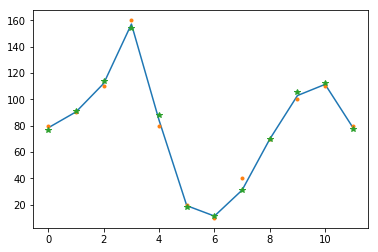

In [83]:
plt.plot(mean_post2)
plt.plot(y,".")
plt.plot(mean,"*")

In [61]:
mean_post2

matrix([[ 78.45],
        [ 90.5 ],
        [112.1 ],
        [157.1 ],
        [ 84.05],
        [ 19.3 ],
        [ 11.4 ],
        [ 31.1 ],
        [ 69.8 ],
        [102.85],
        [111.35],
        [ 78.7 ]])

[[33.64285714]] [[31.1]] [[40]]


In [94]:
# y=np.matrix([[80],[90],[110],[160],[80],[20],[10],[40],[70],[100],[110],[80]])
# sigma_x=0.25*np.identity(12)
# sigma_y=0.25*np.identity(12)
# mean_post2,sigma_post=Ext(mean, sigma_x,sigma_y,H,y,p)

In [95]:
H=np.zeros((10,12))
H[0,0]=H[1,1]=H[2,2]=H[3,3]=H[4,4]=H[5,5]=H[6,8]=H[7,9]=H[8,10]=H[9,11]=1
y=np.matrix([[80],[90],[110],[160],[80],[20],[70],[100],[110],[80]])
sigma_x=0.25*np.identity(12)
sigma_y=0.25*np.identity(10)
mean_post2,sigma_post=Ext(mean, sigma_x,sigma_y,H,y,p)
H

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

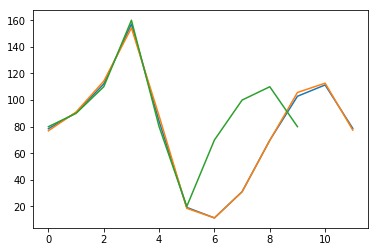

In [97]:
plt.plot(mean_post2)
plt.plot(mean)
plt.plot(y)

In [96]:
print(mean_post2[7],mean[7])

[[31.1]] [[31.1]]
